In [1]:
from PIL import Image, ImageDraw
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

In [2]:
source_path = './Dataset - oral lesions/augment/*'

In [3]:
images_paths = glob.glob(source_path)

In [4]:
class_name = ['Gingivits', 'Cold_Sores', 'Canker_Sores', 'Periodontitis', 'Receding_Gum', 'abfraction', 'Thrush', 'Gingival_Cyst']

## Get filename

In [5]:
images_paths

['./Dataset - oral lesions/augment/Gingivits',
 './Dataset - oral lesions/augment/Cold Sores',
 './Dataset - oral lesions/augment/Canker Sores',
 './Dataset - oral lesions/augment/Periodontitis',
 './Dataset - oral lesions/augment/Receding Gum',
 './Dataset - oral lesions/augment/abfraction',
 './Dataset - oral lesions/augment/Thrush',
 './Dataset - oral lesions/augment/Gingival Cyst']

## Get JPG filename in each file

In [6]:
eight_class = []
class_volume = []

In [7]:
for i in images_paths:
    images = glob.glob( i +'/*.jpeg')
    class_volume.append(len(images))
    eight_class.append(images)

In [8]:
len(eight_class)

8

In [9]:
eight_class

[['./Dataset - oral lesions/augment/Gingivits/16_0_0_6343.jpeg',
  './Dataset - oral lesions/augment/Gingivits/1_0_0_4701.jpeg',
  './Dataset - oral lesions/augment/Gingivits/1_0_0_2905.jpeg',
  './Dataset - oral lesions/augment/Gingivits/1_0_0_1796.jpeg',
  './Dataset - oral lesions/augment/Gingivits/19_0_0_7540.jpeg',
  './Dataset - oral lesions/augment/Gingivits/0_0_0_6836.jpeg',
  './Dataset - oral lesions/augment/Gingivits/13_0_0_74.jpeg',
  './Dataset - oral lesions/augment/Gingivits/29_0_0_2334.jpeg',
  './Dataset - oral lesions/augment/Gingivits/2_0_0_9299.jpeg',
  './Dataset - oral lesions/augment/Gingivits/7_0_0_9687.jpeg',
  './Dataset - oral lesions/augment/Gingivits/7_0_0_6765.jpeg',
  './Dataset - oral lesions/augment/Gingivits/2_0_0_2292.jpeg',
  './Dataset - oral lesions/augment/Gingivits/18_0_0_4676.jpeg',
  './Dataset - oral lesions/augment/Gingivits/26_0_0_7221.jpeg',
  './Dataset - oral lesions/augment/Gingivits/29_0_0_7788.jpeg',
  './Dataset - oral lesions/augment

In [10]:
images = []
labels = []

In [11]:
class_volume

[351, 264, 220, 440, 352, 329, 220, 274]

## Observe the frequency distribution for each class

In [12]:
import matplotlib.ticker as ticker

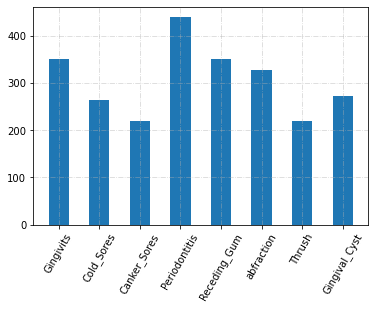

In [13]:
plt.figure()
x = np.arange(8)
y = class_volume
plt.bar(x, y, width=0.5, tick_label=class_name)
plt.grid(linestyle='-.',alpha=0.5)
plt.xticks(x, class_name, rotation = 60)
plt.show()

## Perpare data

In [14]:
for classIndex in range(len(eight_class)):
    for imagefile in eight_class[classIndex]:
        image = Image.open(imagefile).resize((90,90))
        image = image = np.asarray(image)/255.0
        images.append(image)
        labels.append(classIndex)

In [15]:
images = np.array(images)
labels = np.array(labels)

In [16]:
images.shape

(2450, 90, 90, 3)

In [ ]:
encoder = LabelBinarizer()
labels_onehot = encoder.fit_transform( labels )

In [ ]:
images.shape,  labels_onehot.shape

In [ ]:
labels_onehot

## Data visualization

In [ ]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( images, labels, test_size=0.1 )

In [ ]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(x_train)[i])
    plt.xlabel(np.array(class_name)[np.array(y_train)[i]])
plt.show()

## Split data into training data and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( images, labels, test_size=0.1 )

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
images.shape[1:]

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Activation('softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, validation_split=0.2)

In [ ]:
model.summary()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

## Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(90, 90, 3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
datagen = image.ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [ ]:
gen_data = datagen.flow_from_directory(PATH, batch_size=1, 
                                      shuffle=False, 
                                      save_to_dir=SAVE_PATH,
                                      save_prefix='gen', 
      target_size=(224, 224))